In [1]:
import chardet
import pandas as pd
import urllib.request

    
#print(encoding_result)
data = pd.read_csv('../../news/scraping_result/en/2020_down2/2020_down2_Coindesk.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/en/2020_down2/2020_down2_Cointelegraph.csv',error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2020_down2/2020_down2_CryptoNews.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2020_down2/2020_down2_Forbes.csv', error_bad_lines=False))


In [2]:
text = data[['main article']]
#print(text)



In [3]:
text['main article'] = text['main article'].astype(str)
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [4]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# 소문자 적용 , - 문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [15]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [16]:
article_contents = tokenized_doc.values.tolist()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [18]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [19]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [20]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [21]:
word2id = defaultdict(lambda: 0)

In [22]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [23]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [24]:
len(tf_idf_result)

5064

In [25]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

5064


In [26]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [27]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.000*"milano" + 0.000*"farewell" + 0.000*"organize" + 0.000*"schizophrenia" + 0.000*"table" + 0.000*"oversold" + 0.000*"express" + 0.000*"beth"')
(1, '0.001*"censorship" + 0.001*"lowfee" + 0.001*"canaccord" + 0.001*"scope" + 0.001*"persistence" + 0.001*"midapril" + 0.001*"flyover" + 0.001*"counterpart"')
(2, '0.000*"telegram" + 0.000*"gateway" + 0.000*"sarmiento" + 0.000*"blockreward" + 0.000*"venezuelabased" + 0.000*"train" + 0.000*"lennix" + 0.000*"xanpool"')
(3, '0.001*"ireland" + 0.001*"environmental" + 0.001*"mislead" + 0.001*"verifiable" + 0.001*"revolutionary" + 0.001*"footprint" + 0.001*"entire" + 0.001*"dismissal"')


In [28]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [29]:
sentences = article_contents

In [30]:
from gensim.models import Word2Vec

In [31]:
model = Word2Vec(sentences, min_count=1)

In [32]:
len(model.wv.vocab)

5064

In [33]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [34]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [35]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [36]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [37]:
temp_cluster_result['cluster'] = assigned_clusters

In [38]:
temp_cluster_result['raw_data'] = X.tolist()

In [39]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [40]:
from sklearn.metrics import pairwise_distances

In [41]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [42]:
len(cosine_centroid_list)

5064

In [43]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [44]:
sum(temp_distance[3])

125.98081408337629

In [45]:
import scipy.spatial.distance as dist

In [46]:
dist.cosine(X[0],cosine_centroid_list[0])

0.003121182087021168

In [47]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.2792744244316234

In [48]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [49]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [50]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3803,"[-0.004269464872777462, 0.00276149227283895, 0...",tout,0,"[-0.00071931793, 0.00057489687, -0.00022884483...",0.197956,0.001872,1.196083,NaN
2977,"[-0.0034699086099863052, 0.0004779404262080788...",boom,0,"[-0.00071931793, 0.00057489687, -0.00022884483...",0.206339,0.002808,1.203530,NaN
2366,"[-0.004638506565243006, 0.0036799979861825705,...",secret,0,"[-0.00071931793, 0.00057489687, -0.00022884483...",0.211135,0.002808,1.208327,NaN
1592,"[-0.0015655839815735817, -0.000688954023644328...",notice,0,"[-0.00071931793, 0.00057489687, -0.00022884483...",0.221823,0.002808,1.219015,NaN
3807,"[-0.003429594449698925, 0.0016676242230460048,...",firmware,0,"[-0.00071931793, 0.00057489687, -0.00022884483...",0.222364,0.002808,1.219556,NaN
3490,"[-0.004334044177085161, 0.0011472299229353666,...",election,0,"[-0.00071931793, 0.00057489687, -0.00022884483...",0.249454,0.001872,1.247582,NaN
3406,"[-0.0026748867239803076, -0.000546126626431942...",levine,0,"[-0.00071931793, 0.00057489687, -0.00022884483...",0.254392,0.001872,1.252520,NaN
2403,"[-0.004790507256984711, 0.003287680447101593, ...",timeframes,0,"[-0.00071931793, 0.00057489687, -0.00022884483...",0.259906,0.001872,1.258034,NaN
2442,"[0.0010129987495020032, -0.0015752855688333511...",advocate,0,"[-0.00071931793, 0.00057489687, -0.00022884483...",0.266502,0.001872,1.264630,NaN
1617,"[-0.0026081185787916183, 0.0024687780532985926...",tally,0,"[-0.00071931793, 0.00057489687, -0.00022884483...",0.283530,0.001872,1.281657,NaN


In [51]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
644,"[0.00011074701615143567, -0.002358407014980912...",thousand,1,"[0.00060369394, -0.0004583137, 5.097551e-05, -...",0.148990,0.004681,1.144309,NaN
3513,"[0.001230944530107081, 0.001363646355457604, -...",react,1,"[0.00060369394, -0.0004583137, 5.097551e-05, -...",0.148844,0.003745,1.145100,NaN
2535,"[0.0013169427402317524, -0.003415750339627266,...",earlystage,1,"[0.00060369394, -0.0004583137, 5.097551e-05, -...",0.170194,0.002808,1.167386,NaN
3475,"[0.0012328954180702567, 0.00022380922746378928...",truly,1,"[0.00060369394, -0.0004583137, 5.097551e-05, -...",0.188732,0.002808,1.185924,NaN
2615,"[0.003496832912787795, -0.0022824928164482117,...",lubin,1,"[0.00060369394, -0.0004583137, 5.097551e-05, -...",0.203354,0.002808,1.200546,NaN
309,"[0.0019443860510364175, 0.0018300837837159634,...",decouple,1,"[0.00060369394, -0.0004583137, 5.097551e-05, -...",0.229676,0.002808,1.226867,NaN
2579,"[-0.0012763772392645478, -0.003350308863446116...",welcome,1,"[0.00060369394, -0.0004583137, 5.097551e-05, -...",0.229759,0.002808,1.226951,NaN
2305,"[-0.002449481515213847, 0.00274449260905385, 0...",character,1,"[0.00060369394, -0.0004583137, 5.097551e-05, -...",0.241384,0.002808,1.238576,NaN
1456,"[-0.0040929499082267284, -0.002826403593644499...",continent,1,"[0.00060369394, -0.0004583137, 5.097551e-05, -...",0.242540,0.002808,1.239731,NaN
3740,"[0.003895750967785716, -0.00148167391307652, 0...",permit,1,"[0.00060369394, -0.0004583137, 5.097551e-05, -...",0.246818,0.002808,1.244010,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1669,"[-0.005547225940972567, 0.0008295003208331764,...",link,2,"[-0.001203662, -0.0002781692, 0.0011496553, -0...",0.175015,0.002808,1.172207,NaN
3845,"[-0.005574231501668692, -0.00237994990311563, ...",dash,2,"[-0.001203662, -0.0002781692, 0.0011496553, -0...",0.206844,0.002808,1.204035,NaN
2641,"[-0.0016552075976505876, -0.001758936676196754...",revolution,2,"[-0.001203662, -0.0002781692, 0.0011496553, -0...",0.216284,0.002808,1.213476,NaN
1826,"[-0.0014798243064433336, -0.005340691655874252...",familiar,2,"[-0.001203662, -0.0002781692, 0.0011496553, -0...",0.216553,0.002808,1.213744,NaN
4306,"[-0.003039354458451271, 0.0030709353741258383,...",convert,2,"[-0.001203662, -0.0002781692, 0.0011496553, -0...",0.222611,0.002808,1.219802,NaN
2682,"[-0.0002590689982753247, -0.001894552609883248...",congressman,2,"[-0.001203662, -0.0002781692, 0.0011496553, -0...",0.231514,0.000936,1.230578,NaN
1980,"[-0.0033451844938099384, -0.003681167727336287...",midfebruary,2,"[-0.001203662, -0.0002781692, 0.0011496553, -0...",0.234398,0.001872,1.232525,NaN
3230,"[-0.002199506852775812, -0.0035511364694684744...",function,2,"[-0.001203662, -0.0002781692, 0.0011496553, -0...",0.239960,0.001872,1.238087,NaN
3833,"[-0.00512089766561985, -0.0054905228316783905,...",opposite,2,"[-0.001203662, -0.0002781692, 0.0011496553, -0...",0.244639,0.002808,1.241831,NaN
4980,"[-0.002520668786019087, -0.002844396745786071,...",digitalization,2,"[-0.001203662, -0.0002781692, 0.0011496553, -0...",0.251714,0.002808,1.248905,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 거래소 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
10,"[-0.03925977647304535, -0.019613856449723244, ...",bitcoin,3,"[-0.002376686, -0.0013576193, 0.0017829695, -0...",0.000234,0.461521,0.538712,NaN
14,"[-0.031067414209246635, -0.018374396488070488,...",price,3,"[-0.002376686, -0.0013576193, 0.0017829695, -0...",0.000285,0.208761,0.791524,NaN
2,"[-0.02957051247358322, -0.019381128251552582, ...",market,3,"[-0.002376686, -0.0013576193, 0.0017829695, -0...",0.000347,0.183485,0.816862,NaN
1780,"[-0.0528886541724205, -0.026265351101756096, 0...",speaker,3,"[-0.002376686, -0.0013576193, 0.0017829695, -0...",0.000238,0.161954,0.838284,NaN
172,"[-0.024927524849772453, -0.017987487837672234,...",crypto,3,"[-0.002376686, -0.0013576193, 0.0017829695, -0...",0.000378,0.157273,0.843105,NaN
219,"[-0.02673199400305748, -0.01288730837404728, 0...",currency,3,"[-0.002376686, -0.0013576193, 0.0017829695, -0...",0.000660,0.143231,0.857429,NaN
4,"[-0.020640399307012558, -0.015137879177927971,...",trade,3,"[-0.002376686, -0.0013576193, 0.0017829695, -0...",0.000472,0.138550,0.861922,NaN
204,"[-0.021304771304130554, -0.019524190574884415,...",blockchain,3,"[-0.002376686, -0.0013576193, 0.0017829695, -0...",0.000984,0.129188,0.871796,NaN
38,"[-0.023242859169840813, -0.017927158623933792,...",mine,3,"[-0.002376686, -0.0013576193, 0.0017829695, -0...",0.000387,0.127316,0.873071,NaN
218,"[-0.027273718267679214, -0.013107972219586372,...",digital,3,"[-0.002376686, -0.0013576193, 0.0017829695, -0...",0.001222,0.126380,0.874842,NaN


In [54]:
y_km = temp_cluster_result['cluster'].values

In [55]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

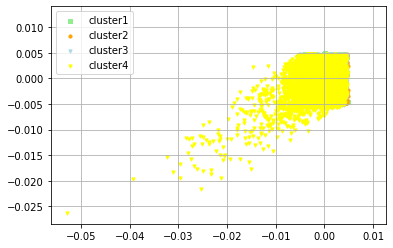

In [56]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [57]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 제도

610

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 인플

653

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 이슈

599

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 거래소 돈

3202

In [61]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==7,'label'] = 10 # 제도한계
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 6 #  인플
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 5 # 이슈
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 12 # 거래소,돈

In [62]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [63]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [64]:
kmeans.inertia_

10.86422348022461

In [65]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[1 3 3 ... 2 2 2]


In [66]:
cluster_values= list(model.wv.vocab)

In [67]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-10.864224433898926


In [68]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [69]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.6342001


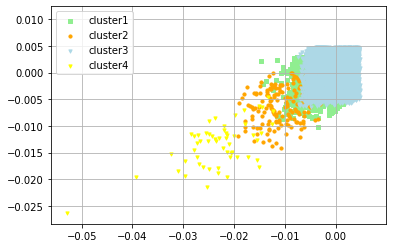

In [70]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [71]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [72]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [73]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [74]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [75]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [76]:
import scipy.spatial.distance as dist

In [77]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [78]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [79]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(30,'score') # 협업

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
353,"[-0.002908471506088972, -0.002887159585952759,...",read,0,"[-0.004547772, -0.002491089, 0.0033756737, -0....",0.027139,0.015915,1.011224,NaN
539,"[-0.004205315839499235, -0.004889771807938814,...",protocol,0,"[-0.004547772, -0.002491089, 0.0033756737, -0....",0.030020,0.018723,1.011297,NaN
411,"[-0.008774093352258205, -0.000631434959359467,...",process,0,"[-0.004547772, -0.002491089, 0.0033756737, -0....",0.028842,0.015915,1.012928,NaN
1172,"[-0.0051887985318899155, -0.000361431506462395...",approach,0,"[-0.004547772, -0.002491089, 0.0033756737, -0....",0.028603,0.014978,1.013624,NaN
168,"[-0.00752196554094553, -0.005080158356577158, ...",website,0,"[-0.004547772, -0.002491089, 0.0033756737, -0....",0.027703,0.014042,1.013660,NaN
125,"[-0.004443098325282335, -0.004405155777931213,...",institutional,0,"[-0.004547772, -0.002491089, 0.0033756737, -0....",0.029784,0.015915,1.013870,NaN
11,"[-0.008271431550383568, -0.005361008923500776,...",address,0,"[-0.004547772, -0.002491089, 0.0033756737, -0....",0.029857,0.015915,1.013943,NaN
3700,"[-0.002427097177132964, -0.006262168753892183,...",volatile,0,"[-0.004547772, -0.002491089, 0.0033756737, -0....",0.028188,0.014042,1.014146,NaN
1180,"[-0.006299139931797981, -0.002602545777335763,...",venture,0,"[-0.004547772, -0.002491089, 0.0033756737, -0....",0.029451,0.014978,1.014473,NaN
1983,"[-0.003814750351011753, -0.006318497937172651,...",conversation,0,"[-0.004547772, -0.002491089, 0.0033756737, -0....",0.026690,0.012170,1.014520,NaN


In [80]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
222,"[-0.006984965410083532, -0.012087435461580753,...",startup,1,"[-0.010977984, -0.006126521, 0.008141918, -0.0...",0.036716,0.046807,0.989908,NaN
552,"[-0.012060564011335373, -0.007271847687661648,...",share,1,"[-0.010977984, -0.006126521, 0.008141918, -0.0...",0.030133,0.037446,0.992688,NaN
1070,"[-0.013622818514704704, -0.006649860646575689,...",payment,1,"[-0.010977984, -0.006126521, 0.008141918, -0.0...",0.029725,0.035574,0.994152,NaN
22,"[-0.01049114391207695, -0.008106080815196037, ...",mean,1,"[-0.010977984, -0.006126521, 0.008141918, -0.0...",0.027477,0.032765,0.994711,NaN
791,"[-0.011663185432553291, -0.0040906257927417755...",bitmain,1,"[-0.010977984, -0.006126521, 0.008141918, -0.0...",0.027666,0.032765,0.994901,NaN
1231,"[-0.00874642189592123, -0.010278102941811085, ...",build,1,"[-0.010977984, -0.006126521, 0.008141918, -0.0...",0.031063,0.033701,0.997361,NaN
768,"[-0.008107656612992287, -0.008779003284871578,...",service,1,"[-0.010977984, -0.006126521, 0.008141918, -0.0...",0.030290,0.032765,0.997525,NaN
160,"[-0.011414827778935432, -0.01029106043279171, ...",economy,1,"[-0.010977984, -0.006126521, 0.008141918, -0.0...",0.030562,0.032765,0.997797,NaN
658,"[-0.00935243722051382, -0.002894592471420765, ...",part,1,"[-0.010977984, -0.006126521, 0.008141918, -0.0...",0.030180,0.031829,0.998351,NaN
1110,"[-0.008035797625780106, -0.006907980423420668,...",gold,1,"[-0.010977984, -0.006126521, 0.008141918, -0.0...",0.039616,0.041191,0.998425,NaN


In [81]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
159,"[-0.005721613764762878, -6.497329741250724e-05...",outbreak,2,"[-0.00072474603, -0.0003526394, 0.00054979627,...",0.026683,0.003745,1.022938,NaN
4468,"[0.002395510906353593, -0.000782376213464886, ...",monroecoleman,2,"[-0.00072474603, -0.0003526394, 0.00054979627,...",0.027273,0.003745,1.023529,NaN
1703,"[-0.004471407271921635, -0.0023735181894153357...",putative,2,"[-0.00072474603, -0.0003526394, 0.00054979627,...",0.026433,0.002808,1.023624,NaN
2487,"[-0.0021218368783593178, 0.0008644228801131248...",endemic,2,"[-0.00072474603, -0.0003526394, 0.00054979627,...",0.024594,0.000936,1.023658,NaN
3559,"[-0.0013229628093540668, -0.005102933384478092...",population,2,"[-0.00072474603, -0.0003526394, 0.00054979627,...",0.026539,0.002808,1.023731,NaN
3490,"[-0.004334044177085161, 0.0011472299229353666,...",election,2,"[-0.00072474603, -0.0003526394, 0.00054979627,...",0.025664,0.001872,1.023791,NaN
4545,"[-0.0024474591482430696, 0.00232520280405879, ...",alysa,2,"[-0.00072474603, -0.0003526394, 0.00054979627,...",0.028493,0.004681,1.023812,NaN
1939,"[-0.002258334308862686, -0.004181433469057083,...",ordinary,2,"[-0.00072474603, -0.0003526394, 0.00054979627,...",0.026637,0.002808,1.023828,NaN
1719,"[-0.0010835391003638506, 0.004314241465181112,...",resident,2,"[-0.00072474603, -0.0003526394, 0.00054979627,...",0.026674,0.002808,1.023866,NaN
522,"[0.0019025475485250354, -0.00298399874009192, ...",bitcoins,2,"[-0.00072474603, -0.0003526394, 0.00054979627,...",0.027688,0.003745,1.023944,NaN


In [82]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(30,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
6,"[-0.023230504244565964, -0.018762625753879547,...",time,3,"[-0.023027785, -0.013508857, 0.017514728, -0.1...",0.035349,0.121699,0.913650,NaN
218,"[-0.027273718267679214, -0.013107972219586372,...",digital,3,"[-0.023027785, -0.013508857, 0.017514728, -0.1...",0.044538,0.126380,0.918158,NaN
204,"[-0.021304771304130554, -0.019524190574884415,...",blockchain,3,"[-0.023027785, -0.013508857, 0.017514728, -0.1...",0.063481,0.129188,0.934292,NaN
40,"[-0.027154020965099335, -0.011663333512842655,...",halve,3,"[-0.023027785, -0.013508857, 0.017514728, -0.1...",0.035510,0.101104,0.934406,NaN
115,"[-0.027949048206210136, -0.014526917599141598,...",exchange,3,"[-0.023027785, -0.013508857, 0.017514728, -0.1...",0.032057,0.097359,0.934697,NaN
42,"[-0.024982238188385963, -0.011419082060456276,...",investor,3,"[-0.023027785, -0.013508857, 0.017514728, -0.1...",0.036251,0.100168,0.936083,NaN
341,"[-0.0215530414134264, -0.012171183712780476, 0...",fund,3,"[-0.023027785, -0.013508857, 0.017514728, -0.1...",0.031529,0.093615,0.937915,NaN
15,"[-0.026180578395724297, -0.01761041395366192, ...",high,3,"[-0.023027785, -0.013508857, 0.017514728, -0.1...",0.038329,0.095487,0.942842,NaN
219,"[-0.02673199400305748, -0.01288730837404728, 0...",currency,3,"[-0.023027785, -0.013508857, 0.017514728, -0.1...",0.093092,0.143231,0.949862,NaN
496,"[-0.024977168068289757, -0.009112749248743057,...",year,3,"[-0.023027785, -0.013508857, 0.017514728, -0.1...",0.030800,0.080509,0.950292,NaN


In [87]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #협업

467

In [88]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #비즈

163

In [89]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #이슈

4378

In [90]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #투자

56

In [91]:
temp_cluster_result1['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 8 # 협업
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 7 # 비즈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 5 # 이슈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 12 # 투자

In [92]:
temp_cluster_result1['result'] = 2 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 2
temp_cluster_result1['Silhouette'] = 0.6342001
temp_cluster_result['Silhouette'] = 0.6342001

In [94]:
temp_cluster_result1.to_csv("../cluster/en_news/2020_down2/(test)_en_news_2020_down2_euclidean.csv")
temp_cluster_result.to_csv("../cluster/en_news/2020_down2/(test)_en_news_2020_down2_cosine.csv")

In [88]:
word_vectors = model.wv

In [89]:
vocabs = word_vectors.vocab.keys()

In [90]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [91]:
print(word_vectors.similarity(w1='little',w2='push'))

0.95787585


In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [93]:
xys

array([[-0.26709191,  0.01406881],
       [ 2.0919719 ,  0.03097875],
       [-0.23377647, -0.01778022],
       ...,
       [-0.51360786,  0.01641949],
       [-0.48803444,  0.00649237],
       [-0.43142623,  0.00800493]])

In [94]:
xys[:,0]

array([-0.26709191,  2.0919719 , -0.23377647, ..., -0.51360786,
       -0.48803444, -0.43142623])

In [95]:
xys[:,1]

array([ 0.01406881,  0.03097875, -0.01778022, ...,  0.01641949,
        0.00649237,  0.00800493])

In [96]:
xs = xys[:,0]
ys = xys[:,1]

In [97]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)


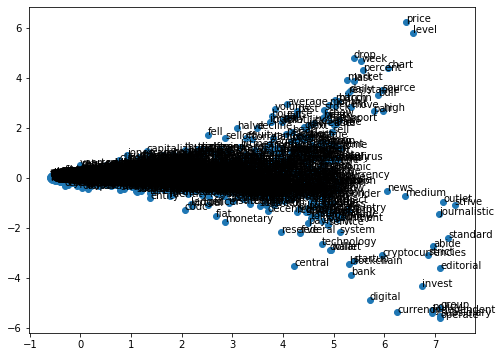

In [98]:
plot_2d_graph(vocabs,xs,ys)

In [99]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>